# Maximum-likelihood estimate for mean lifetime in radiactive decay

## Tasks

a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$

b) Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [2]:
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

# Task a


We have given, that: 

$$\sigma^2 = -\left( \frac{\partial^2 ln L(\tau)}{\partial^2 \tau}|_{\tau = \hat{\tau}} \right)^{-1}$$

Hence: 

$$\sigma^2 = -\left( \frac{\partial^2 ln \prod_{i=1}^{n} f(t_i,\tau)}{\partial^2 \tau}|_{\tau = \hat{\tau}} \right)^{-1}= -\left( \frac{\partial^2 \sum_{i=1}^n ln \frac{1}{\tau}e^{-t_i/\tau}}{\partial^2 \tau}|_{\tau = \hat{\tau}} \right)^{-1} = \left( \frac{\partial^2 \sum_{i=1}^n \left( \frac{t_i}{\tau}+ln(\tau) \right)}{\partial^2 \tau}|_{\tau = \hat{\tau}} \right)^{-1}$$
$$= \left( \sum_{i=1}^n \left( \frac{2 t_i - \hat{\tau}} {\hat{\tau}^{3}} \right) \right)^{-1}=\left( \frac{2\sum_{i=1}^n \left( t_i \right) - \sum_{i=1}^n \left( \hat{\tau} \right) }{\sum_{i=1}^n  \left( \hat{\tau}^3 \right)}  \right)^{-1} = \left( \frac{2 n \hat{\tau} - n \hat{\tau}}{\hat{\tau}^3}  \right)^{-1}$$
$$ \left( \frac{n}{\hat{\tau}^2} \right)^{-1} \rightarrow \sigma_{\tau} =  \frac{\hat{\tau}}{\sqrt{n}}$$

# Task b


In [3]:
set_1 = generate_data(2,30)
set_2 = generate_data(2,300)
set_3 = generate_data(2,100000)

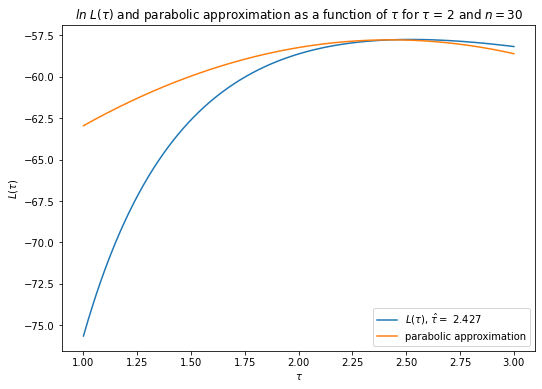

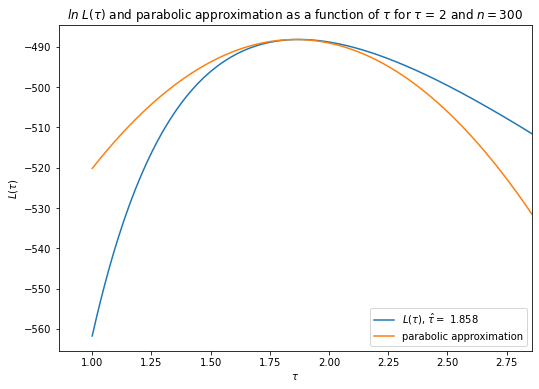

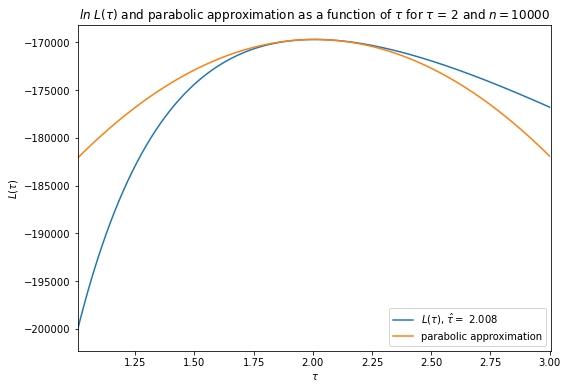

In [4]:
def dist(t,tau):
    return 1/tau * np.exp(-t/tau)
def likely(val,tau):
    y = 0
    for i in range(len(val)):
        y+= np.log(dist(val[i],tau))
    return y

def tau_hat(val):
    y = 0
    for i in range(len(val)):
        if(i>0):
            y+= val[i]
    return 1/len(val) * y

def sigma(tau_hat,n):
    return tau_hat/np.sqrt(n)

def likely_para(tau,val):
    th = tau_hat(val)
    sig = sigma(th,len(val))
    return likely(val,th)-(tau-th)**2/(2*sig**2)
    #return np.log(th)-(tau-th)**2/(2*sig**2)
    
tau = np.linspace(1,3,1000)
L_1 = likely(set_1,tau)
L_2 = likely(set_2,tau)
L_3= likely(set_3,tau)
L_1_para = likely_para(tau,set_1)
L_2_para = likely_para(tau,set_2)
L_3_para = likely_para(tau,set_3)
space = 1
plt.figure(figsize=(np.sqrt(2)*6,6))
plt.title(r"$ln$ $L(\tau)$ and parabolic approximation as a function of $\tau$ for $\tau$ = 2 and $n = $30")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$L(\tau)$")
plt.plot(tau,L_1,label=r"$L(\tau)$, $\hat{} = $ {:.3f}".format(r"{\tau}",tau_hat(set_1)))
plt.plot(tau,L_1_para,label="parabolic approximation")
#plt.xlim(tau_hat(set_1)-space,tau_hat(set_1)+space)
plt.legend()
plt.figure(figsize=(np.sqrt(2)*6,6))
plt.title(r"$ln$ $L(\tau)$ and parabolic approximation as a function of $\tau$ for $\tau$ = 2 and $n = $300")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$L(\tau)$")
plt.plot(tau,L_2,label=r"$L(\tau)$, $\hat{} = $ {:.3f}".format(r"{\tau}",tau_hat(set_2)))
plt.plot(tau,L_2_para,label="parabolic approximation")
plt.xlim(tau_hat(set_2)-space,tau_hat(set_2)+space)
plt.legend()
plt.figure(figsize=(np.sqrt(2)*6,6))
plt.title(r"$ln$ $L(\tau)$ and parabolic approximation as a function of $\tau$ for $\tau$ = 2 and $n = $10000")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$L(\tau)$")
plt.plot(tau,L_3,label=r"$L(\tau)$, $\hat{} = $ {:.3f}".format(r"{\tau}",tau_hat(set_3)))
plt.plot(tau,L_3_para,label="parabolic approximation")
plt.xlim(tau_hat(set_3)-space,tau_hat(set_3)+space)
plt.legend()

The maximum likelyhood function is approximated well for $\tau \approx \hat{\tau}$, with better accuracy for larger n. 
One can see further, that $\hat{\tau}$ approaches the real $\tau$ for higher n, as indicated by the maximum of the respective functions.

# Task c

In [5]:
sets = []
true_tau = 2
total = 1000
for i in range(total):
    sets.append(generate_data(true_tau,500))
sets = np.array(sets)

counter = 0
for i in sets:
        th = tau_hat(i)
        sig = sigma(th,len(i))
        low = th-sig
        up = th+sig
        if ((true_tau >= low) and (true_tau <= up)):
            counter+=1
dev = counter/total * 100
print("Likelyhood of being within one sigma of the real tau: {:.3f}".format(dev) ,"%", " (",counter, " out of ", total, " times )")

Likelyhood of being within one sigma of the real tau: 68.900 %  ( 689  out of  1000  times )


A probability value of roughly 68% percent was expected, as the distribution should follow a gaussian for large n.